### **Phase II**

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

In [2]:
data = pd.read_csv('air_quality_streamed.csv')

In [3]:
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Timestamp
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9465,04/04/2005,14.00.00,2.2,1071.0,275.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028,2005-04-04 14:00:00
9466,04/04/2005,14.00.00,2.2,1071.0,275.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028,2005-04-04 14:00:00
9467,04/04/2005,14.00.00,2.2,1071.0,275.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028,2005-04-04 14:00:00
9468,04/04/2005,14.00.00,2.2,1071.0,275.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028,2005-04-04 14:00:00


In [4]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.set_index('Timestamp', inplace=True)

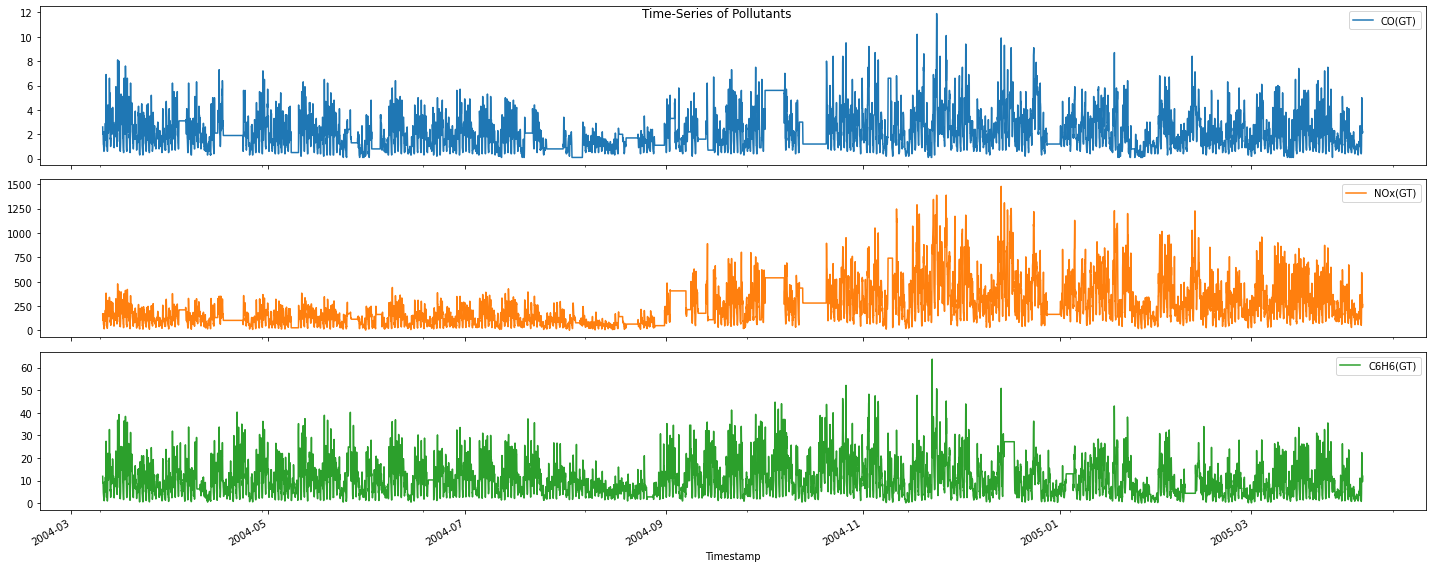

In [5]:
data[['CO(GT)', 'NOx(GT)', 'C6H6(GT)']].plot(figsize=(20, 8),subplots=True, title='Time-Series of Pollutants')
plt.tight_layout()
plt.show()

In [6]:
data.reset_index(inplace=True)
data['hour'] = data['Timestamp'].dt.hour
data['dayofweek'] = data['Timestamp'].dt.dayofweek

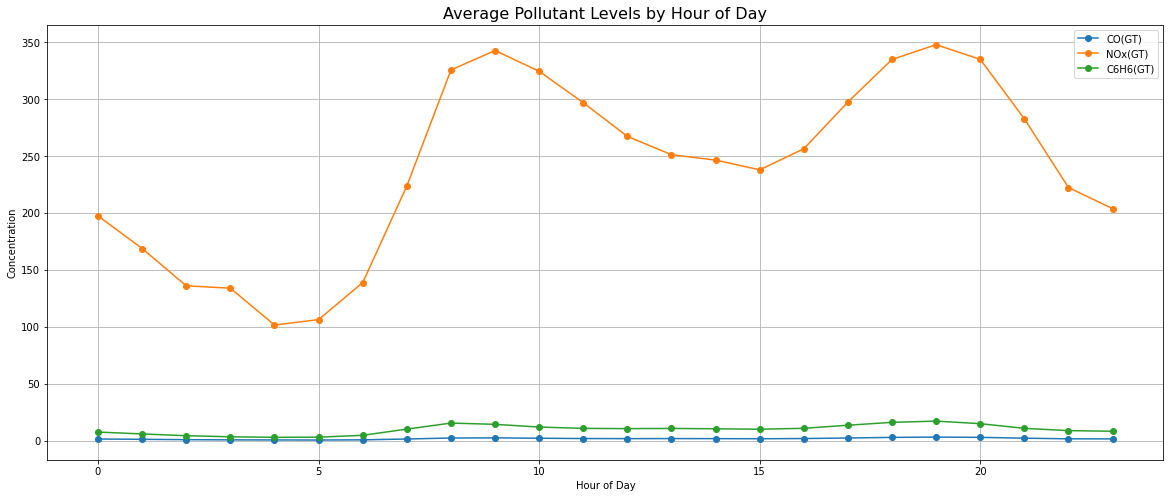

In [7]:
hourly_avg = data.groupby('hour')[['CO(GT)', 'NOx(GT)', 'C6H6(GT)']].mean()

hourly_avg.plot(figsize=(20, 8), marker='o')
plt.title('Average Pollutant Levels by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Concentration')
plt.grid(True)
plt.show()

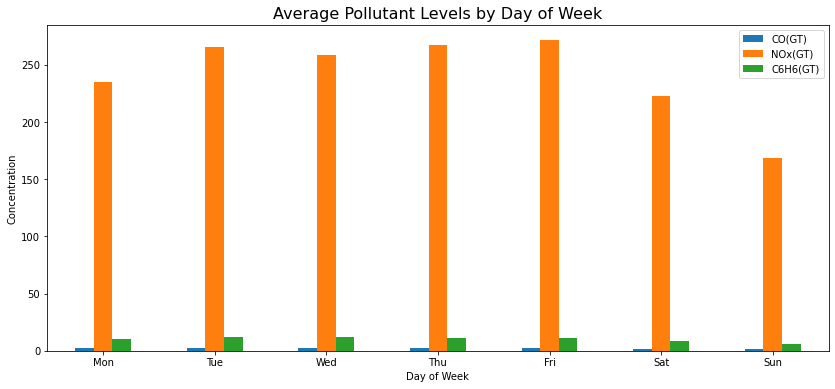

In [8]:
daily_avg = data.groupby('dayofweek')[['CO(GT)', 'NOx(GT)', 'C6H6(GT)']].mean()

daily_avg.plot(kind='bar', figsize=(14, 6))
plt.title('Average Pollutant Levels by Day of Week', fontsize=16)
plt.xlabel('Day of Week')
plt.ylabel('Concentration')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()

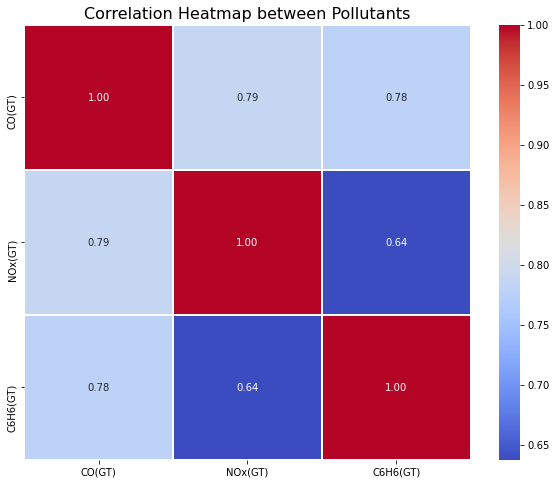

In [9]:
corr = data[['CO(GT)', 'NOx(GT)', 'C6H6(GT)']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap between Pollutants', fontsize=16)
plt.show()

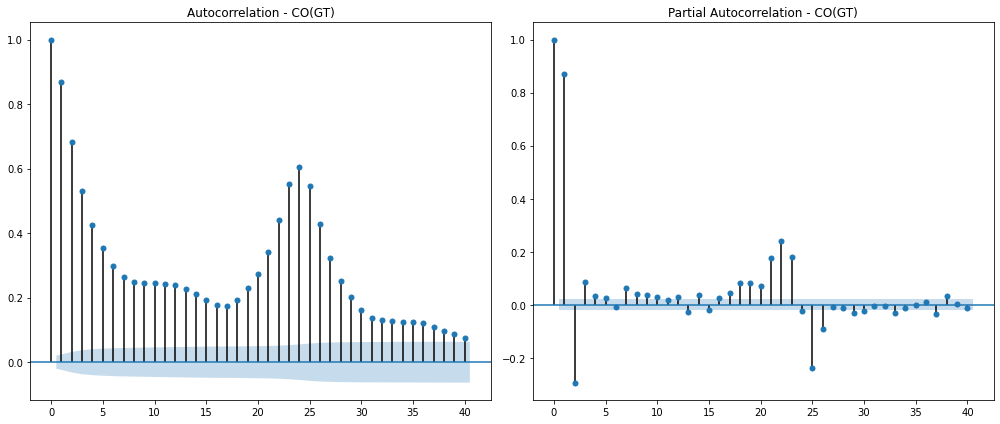

In [10]:
# # Drop NA to avoid issues
co_series1 = data['CO(GT)'].dropna()

# Plot ACF and PACF
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plot_acf(co_series1, ax=plt.gca(), lags=40)
plt.title("Autocorrelation - CO(GT)")

plt.subplot(1, 2, 2)
plot_pacf(co_series1, ax=plt.gca(), lags=40, method='ywm')
plt.title("Partial Autocorrelation - CO(GT)")

plt.tight_layout()
plt.show()

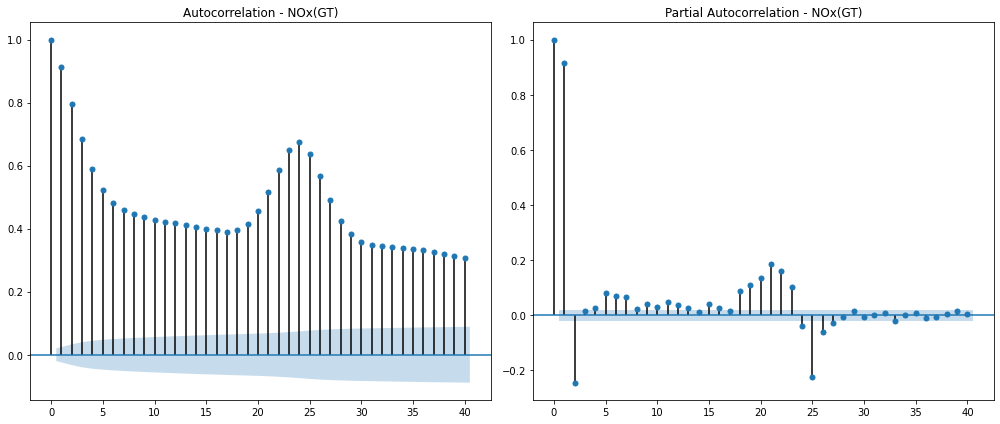

In [11]:
# # Drop NA to avoid issues
co_series2 = data['NOx(GT)'].dropna()

# Plot ACF and PACF
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plot_acf(co_series2, ax=plt.gca(), lags=40)
plt.title("Autocorrelation - NOx(GT)")

plt.subplot(1, 2, 2)
plot_pacf(co_series2, ax=plt.gca(), lags=40, method='ywm')
plt.title("Partial Autocorrelation - NOx(GT)")

plt.tight_layout()
plt.show()

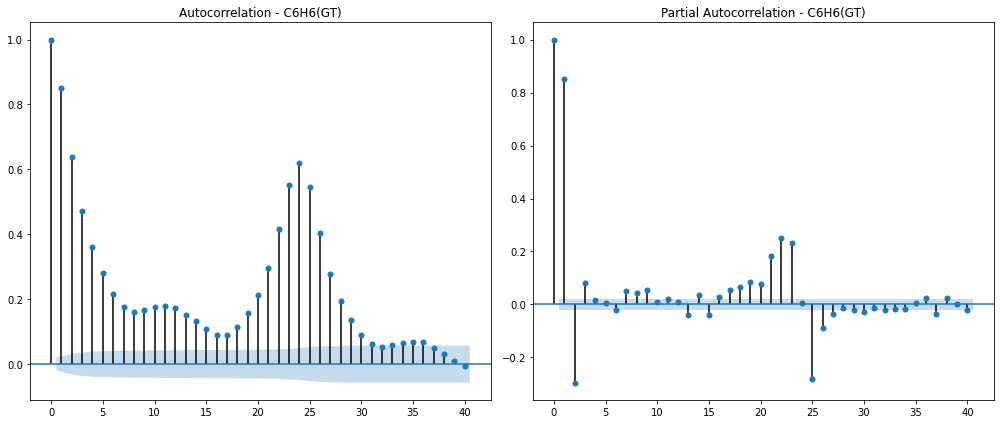

In [12]:
# # Drop NA to avoid issues
co_series3 = data['C6H6(GT)'].dropna()

# Plot ACF and PACF
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plot_acf(co_series3, ax=plt.gca(), lags=40)
plt.title("Autocorrelation - C6H6(GT)")

plt.subplot(1, 2, 2)
plot_pacf(co_series3, ax=plt.gca(), lags=40, method='ywm')
plt.title("Partial Autocorrelation - C6H6(GT)")

plt.tight_layout()
plt.show()

In [13]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.set_index('Timestamp', inplace=True)

In [14]:
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'hour', 'dayofweek'],
      dtype='object')

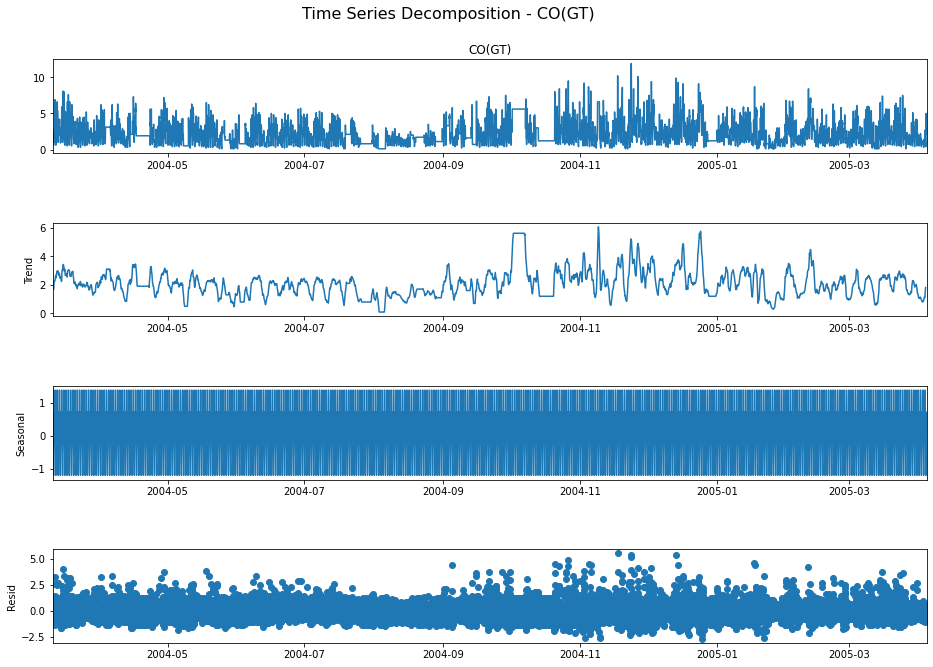

In [15]:
data = data.resample('H').mean()  # If hourly data
data= data.dropna()
# Run decomposition
decomposition = seasonal_decompose(data['CO(GT)'], model='additive', period=24)  # daily seasonality

# Plot results
decomposition.plot()
plt.gcf().set_size_inches(14, 10)
plt.suptitle("Time Series Decomposition - CO(GT)", fontsize=16)
plt.show()

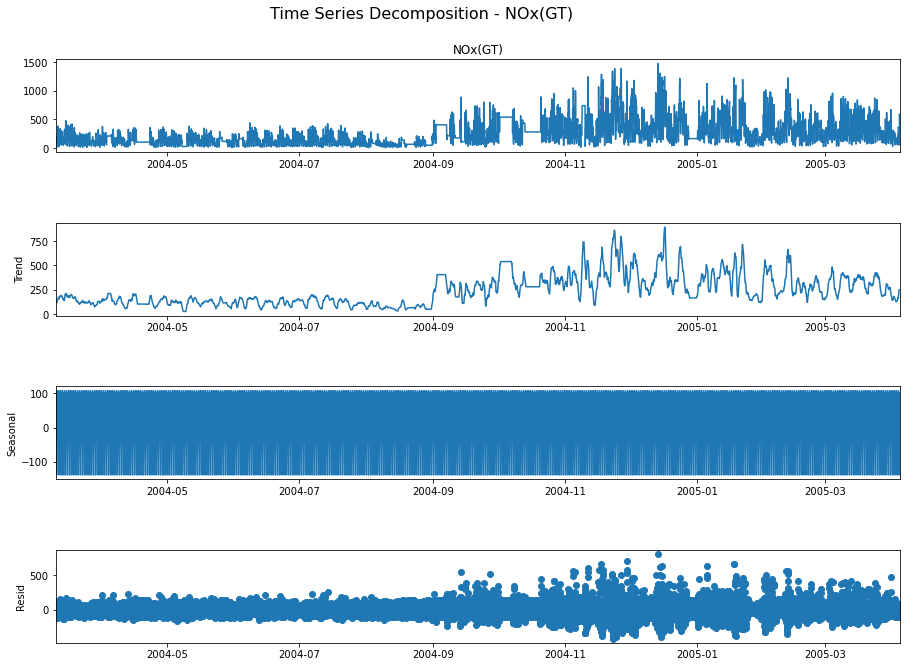

In [16]:
# Run decomposition
decomposition = seasonal_decompose(data['NOx(GT)'], model='additive', period=24)  # daily seasonality

# Plot results
decomposition.plot()
plt.gcf().set_size_inches(14, 10)
plt.suptitle("Time Series Decomposition - NOx(GT)", fontsize=16)
plt.show()

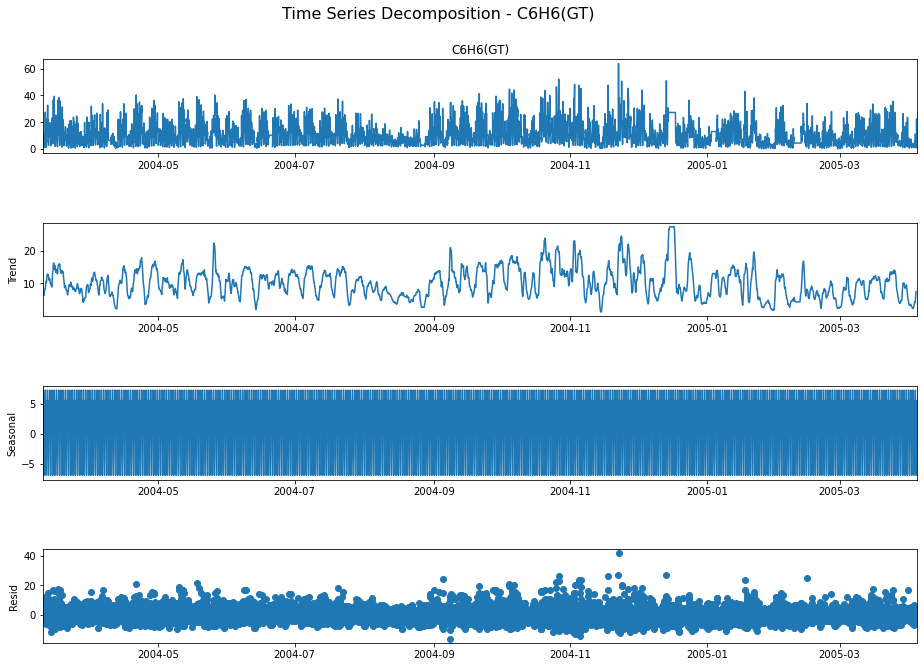

In [17]:
# Run decomposition
decomposition = seasonal_decompose(data['C6H6(GT)'], model='additive', period=24)  # daily seasonality

# Plot results
decomposition.plot()
plt.gcf().set_size_inches(14, 10)
plt.suptitle("Time Series Decomposition - C6H6(GT)", fontsize=16)
plt.show()